# [Financial Concepts in Python](https://www.datacamp.com/completed/statement-of-accomplishment/course/d1fdf2c59d271dc380d2afefd70c3be3e7a7add5)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/finance/financial_concepts_in_python/notebook.ipynb)

**Contents**
- [Time Value of Money](#Time-Value-of-Money)
- [Data-Driven Financial Decisions](#Data-Driven-Financial-Decisions)
- [Mortgages](#Mortgages)
- [Budgeting Project](#Budgeting-Project)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf
import pandas as pd

## Time Value of Money

In [2]:
# present value of an investment worth $10k in 15 years with an annual interest rate of 3%
investment_1 = npf.pv(rate=0.03, nper=15, pmt=0, fv=10000)

# value returned is negative, so multiply by -1
print("Investment 1 is worth " + str(round(-investment_1, 2)) + " in today's dollars")

# present value of an investment worth $10,000 in 10 years with an annual interest rate of 5%
investment_2 = npf.pv(rate=0.05, nper=10, pmt=0, fv=10000)
print("Investment 2 is worth " + str(round(-investment_2, 2)) + " in today's dollars")

Investment 1 is worth 6418.62 in today's dollars
Investment 2 is worth 6139.13 in today's dollars


In [3]:
# future value of $10,000 in 15 years with an annual interest rate of 5%
investment_1 = npf.fv(rate=0.05, nper=15, pmt=0, pv=-10000)
print("Investment 1 will yield a total of $" + str(round(investment_1, 2)) + " in 15 years")

# future value of $10,000 in 15 years with an annual interest rate of 8%
investment_2 = npf.fv(rate=0.08, nper=15, pmt=0, pv=-10000)
print("Investment 2 will yield a total of $" + str(round(investment_2, 2)) + " in 15 years")

Investment 1 will yield a total of $20789.28 in 15 years
Investment 2 will yield a total of $31721.69 in 15 years


In [4]:
# inflation-adjusted present value of a $10k investment in 10 years with an annual interest rate of 8% and inflation rate of 3%
investment_1 = npf.fv(rate=0.08, nper=10, pmt=0, pv=-10000)
investment_1_discounted = npf.pv(rate=0.03, nper=10, pmt=0, fv=investment_1)
print(
    "After adjusting for inflation, investment 1 is worth $"
    + str(round(-investment_1_discounted, 2))
    + " in today's dollars"
)

After adjusting for inflation, investment 1 is worth $16064.43 in today's dollars


In [5]:
cash_flows = np.array([100, 100, 100, 100, 100])

# net present value of an investment with `cash_flows` at a discount rate of 3% per year
investment_1 = npf.npv(rate=0.03, values=cash_flows)
print(
    "Investment 1's net present value is $" + str(round(investment_1, 2)) + " in today's dollars"
)

Investment 1's net present value is $471.71 in today's dollars


In [6]:
cash_flows_1 = np.array([-250, 100, 200, 300, 400])
cash_flows_2 = np.array([-250, 300, -250, 300, 300])

# net present value of two investments with `cash_flows_1` and `cash_flows_2` at a discount rate of 3% per year
investment_1 = npf.npv(rate=0.03, values=cash_flows_1)
investment_2 = npf.npv(rate=0.03, values=cash_flows_2)
print(
    "The net present value of Investment 1 is worth $"
    + str(round(investment_1, 2))
    + " in today's dollars"
)
print(
    "The net present value of Investment 2 is worth $"
    + str(round(investment_2, 2))
    + " in today's dollars"
)

The net present value of Investment 1 is worth $665.54 in today's dollars
The net present value of Investment 2 is worth $346.7 in today's dollars


In [7]:
# present value of a $100 payment received 30 years from now with an annual inflation rate of 3%
investment_1 = npf.pv(rate=0.03, nper=30, pmt=0, fv=100)
print("Investment 1 is worth $" + str(round(-investment_1, 2)) + " in today's dollars")

# same payment, but received 50 and 100 years from now
investment_2 = npf.pv(rate=0.03, nper=50, pmt=0, fv=100)
investment_3 = npf.pv(rate=0.03, nper=100, pmt=0, fv=100)
print("Investment 2 is worth $" + str(round(-investment_2, 2)) + " in today's dollars")
print("Investment 3 is worth $" + str(round(-investment_3, 2)) + " in today's dollars")

Investment 1 is worth $41.2 in today's dollars
Investment 2 is worth $22.81 in today's dollars
Investment 3 is worth $5.2 in today's dollars


## Data-Driven Financial Decisions

### IRR

The _Internal Rate of Return_ (IRR) is a financial metric used to estimate the profitability of potential investments. It is the discount rate that makes the _Net Present Value_ (NPV) of all cash flows equal to zero.

To calculate IRR, you need the initial investment (usually a negative number) and the series of future cash flows (positive numbers).

In [8]:
# cash flows
cf_project_1 = np.array([-1000, 200, 250, 300, 350, 400, 450, 500, 550, 600])
cf_project_2 = np.array([-1000, 150, 225, 300, 375, 425, 500, 575, 600, 625])

# scale by 1000x
cf_project_1 = cf_project_1 * 1000
cf_project_2 = cf_project_2 * 1000

# calculate IRR
irr_project_1 = npf.irr(cf_project_1)
irr_project_2 = npf.irr(cf_project_2)
print("Project 1 IRR: " + str(round(100 * irr_project_1, 2)) + "%")
print("Project 2 IRR: " + str(round(100 * irr_project_2, 2)) + "%")

Project 1 IRR: 28.92%
Project 2 IRR: 28.78%


### WACC

The _Weighted Average Cost of Capital_ (WACC) is the average rate of return that a company expects to pay to its investors.

WACC is calculated by taking into account the proportion of equity and debt in the company's capital structure, as well as the cost of equity and debt.

$$
WACC = F_{E} \cdot C_{E} + F_{D} \cdot C_{D} \cdot (1 - T)
$$

Where:

- $F_{E}$ is the fraction of equity in the capital structure (proportion % of a company's financing that comes from equity)
- $F_{D}$ is the fraction of debt in the capital structure
- $C_{E}$ is the cost of equity (rate of return required by equity investors)
- $C_{D}$ is the cost of debt
- $T$ is the corporate tax rate

The proportion of financing can be calculated as follows:

$$
\begin{align*}
F_{E} &= \frac{E}{E + D} \\
F_{D} &= \frac{D}{E + D}
\end{align*}
$$

Where:

- $E$ is the market value of equity
- $D$ is the market value of debt

In [9]:
percent_debt = 0.50
percent_equity = 0.50

# cost of equity is 18%
cost_equity = 0.18

# cost of debt is 12%
cost_debt = 0.12

# tax rate is 35%
tax_rate = 0.35

# calculate WACC
wacc = percent_equity * cost_equity + percent_debt * cost_debt * (1 - tax_rate)
print("WACC: " + str(round(100 * wacc, 2)) + "%")

WACC: 12.9%


### NPV

The _Net Present Value_ (NPV) is the difference between the present value of cash inflows and the present value of cash outflows over a period of time.

$$
NPV = \sum_{t=0}^{n} \frac{C_t}{(1 + r)^t}
$$

Where:

- $C_t$ is the cash flow at time $t$
- $r$ is the discount rate or IRR
- $n$ is the number of time periods

In [10]:
cf_project_1 = np.array(
    [-1000000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000]
)
cf_project_2 = np.array(
    [-1000000, 150000, 225000, 300000, 375000, 425000, 500000, 575000, 600000, 625000]
)

# WACC of 12.9%
wacc = 0.129

# calculate NPV
npv_project_1 = npf.npv(wacc, cf_project_1)
npv_project_2 = npf.npv(wacc, cf_project_2)

### EAA

The _Equivalent Annual Annuity_ (EAA) is a financial metric used to compare the profitability of investments with different lifespans or cash flow patterns. It converts the NPV into an equivalent annual cash flow that would be received over the life of the investment, assuming a constant discount rate.

$$
EAA = \frac{NPV \cdot r}{1 - (1 + r)^{-n}}
$$

Where:

- $EAA$ is the equivalent annual annuity
- $NPV$ is the net present value
- $r$ is the discount rate
- $n$ is the number of time periods

In [11]:
cf_project_1 = np.array([-700000, 100000, 150000, 200000, 250000, 300000, 350000, 400000])
cf_project_2 = np.array([-400000, 50000, 100000, 150000, 200000, 250000, 300000])

# calculate IRR
irr_project_1 = npf.irr(cf_project_1)
irr_project_2 = npf.irr(cf_project_2)
print("Project 1 IRR: " + str(round(100 * irr_project_1, 2)) + "%")
print("Project 2 IRR: " + str(round(100 * irr_project_2, 2)) + "%")

# WACC of 12.9%
wacc = 0.129

# calculate NPV
npv_project_1 = npf.npv(wacc, cf_project_1)
npv_project_2 = npf.npv(wacc, cf_project_2)
print("Project 1 NPV: " + str(round(npv_project_1, 2)))
print("Project 2 NPV: " + str(round(npv_project_2, 2)))

# calculate EAA
eaa_project_1 = npf.pmt(rate=wacc, nper=8, pv=-npv_project_1, fv=0)
eaa_project_2 = npf.pmt(rate=wacc, nper=7, pv=-npv_project_2, fv=0)

Project 1 IRR: 22.94%
Project 2 IRR: 26.89%
Project 1 NPV: 302744.98
Project 2 NPV: 231228.39


## Mortgages

In [12]:
home_value = 800000
down_payment_percent = 0.2
down_payment = home_value * down_payment_percent
mortgage_loan = home_value - down_payment
print("Initial Down Payment: " + str(down_payment))
print("Mortgage Loan: " + str(mortgage_loan))

Initial Down Payment: 160000.0
Mortgage Loan: 640000.0


In [13]:
mortgage_rate = 0.0375
mortgage_rate_periodic = (1 + mortgage_rate) ** (1 / 12) - 1
mortgage_payment_periods = 30 * 12
periodic_mortgage_payment = -1 * npf.pmt(
    mortgage_rate_periodic,
    mortgage_payment_periods,
    mortgage_loan,
)
print("Monthly Mortgage Payment: " + str(round(periodic_mortgage_payment, 2)))

Monthly Mortgage Payment: 2941.13


### Amortization

In [14]:
initial_interest_payment = mortgage_loan * mortgage_rate_periodic
initial_principal_payment = periodic_mortgage_payment - initial_interest_payment
print("Initial Interest Payment: " + str(round(initial_interest_payment, 2)))
print("Initial Principal Payment: " + str(round(initial_principal_payment, 2)))

Initial Interest Payment: 1966.43
Initial Principal Payment: 974.7


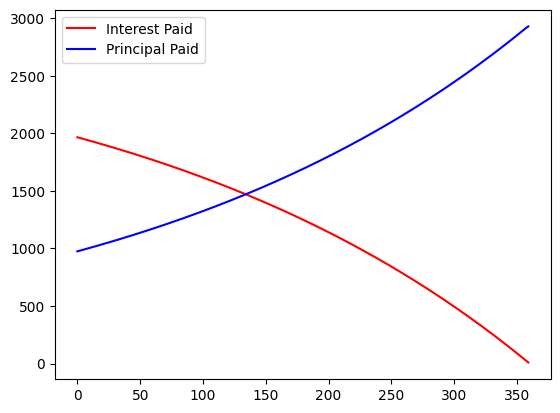

In [15]:
principal_remaining = np.arange(mortgage_payment_periods, dtype=float)
interest_paid = np.arange(mortgage_payment_periods, dtype=float)
principal_paid = np.arange(mortgage_payment_periods, dtype=float)


def print_payments(i, interest_payment, principal_payment, principal_remaining):
    if i <= 5:
        print(
            "Period "
            + str(i)
            + ": "
            + "Interest Paid: "
            + str(interest_payment)
            + " | Principal Paid: "
            + str(principal_payment)
            + " | Remaining Balance: "
            + str(principal_remaining[i])
        )


for i in range(0, mortgage_payment_periods):
    if i == 0:
        previous_principal_remaining = mortgage_loan
    else:
        previous_principal_remaining = principal_remaining[i - 1]

    interest_payment = round(previous_principal_remaining * mortgage_rate_periodic, 2)
    principal_payment = round(periodic_mortgage_payment - interest_payment, 2)

    if previous_principal_remaining - principal_payment < 0:
        principal_payment = previous_principal_remaining

    interest_paid[i] = interest_payment
    principal_paid[i] = principal_payment
    principal_remaining[i] = previous_principal_remaining - principal_payment


interest_plot = plt.Line2D([0], [0], color="red", label="Interest Paid")
principal_plot = plt.Line2D([0], [0], color="blue", label="Principal Paid")

plt.plot(interest_paid, color="red")
plt.plot(principal_paid, color="blue")
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.show()

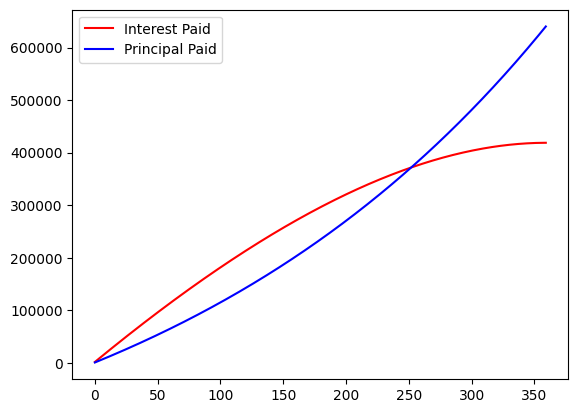

In [16]:
cumulative_home_equity = np.cumsum(principal_paid)
cumulative_interest_paid = np.cumsum(interest_paid)
cumulative_percent_owned = down_payment_percent + (cumulative_home_equity / home_value)

plt.plot(cumulative_interest_paid, color="red")
plt.plot(cumulative_home_equity, color="blue")
plt.legend(handles=[interest_plot, principal_plot], loc=2)
plt.show()

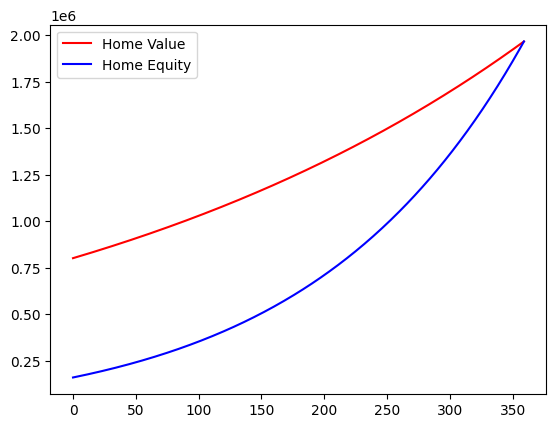

In [17]:
growth_array = np.full(360, 0.0025)
cumulative_growth_forecast = np.cumprod(1 + growth_array)
home_value_forecast = home_value * cumulative_growth_forecast
cumulative_home_value_owned = cumulative_percent_owned * home_value_forecast

home_value_plot = plt.Line2D([0], [0], color="red", label="Home Value")
home_equity_plot = plt.Line2D([0], [0], color="blue", label="Home Equity")

plt.plot(home_value_forecast, color="red")
plt.plot(cumulative_home_value_owned, color="blue")
plt.legend(handles=[home_value_plot, home_equity_plot], loc=2)
plt.show()

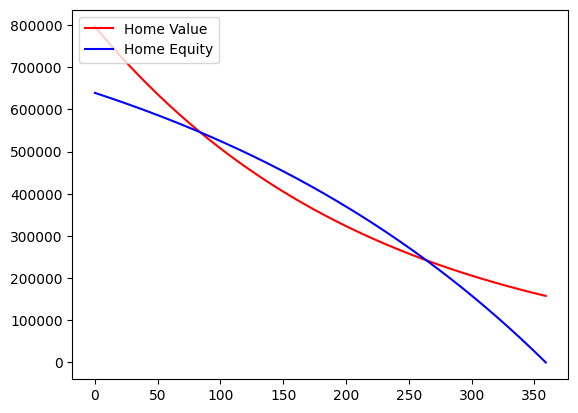

In [18]:
decline_array = np.full(360, -0.0045)
cumulative_decline_forecast = np.cumprod(1 + decline_array)
home_value_forecast = home_value * cumulative_decline_forecast
underwater = home_value - cumulative_home_equity
pd.Series(underwater).value_counts()

plt.plot(home_value_forecast, color="red")
plt.plot(principal_remaining, color="blue")
plt.legend(handles=[home_value_plot, home_equity_plot], loc=2)
plt.show()

## Budgeting Project

In [19]:
salary = 85000
tax_rate = 0.3
salary_after_taxes = salary * (1 - tax_rate)
monthly_takehome_salary = salary_after_taxes / 12
print("Salary after taxes: " + str(round(salary_after_taxes, 2)))
print("Monthly takehome salary: " + str(round(monthly_takehome_salary, 2)))

Salary after taxes: 59500.0
Monthly takehome salary: 4958.33


In [20]:
monthly_rent = 1200
daily_food_budget = 30
monthly_food_budget = daily_food_budget * 30
monthly_entertainment_budget = 200
monthly_unforeseen_expenses = 250
monthly_expenses = (
    monthly_rent + monthly_food_budget + monthly_entertainment_budget + monthly_unforeseen_expenses
)
monthly_savings = monthly_takehome_salary - monthly_expenses
print("Monthly expenses: " + str(round(monthly_expenses, 2)))
print("Monthly savings: " + str(round(monthly_savings, 2)))

Monthly expenses: 2550
Monthly savings: 2408.33


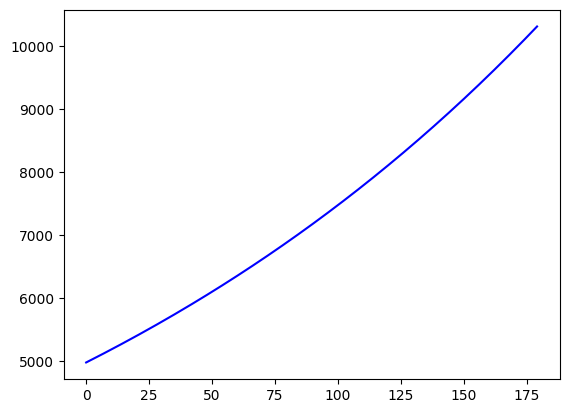

In [21]:
forecast_months = 12 * 15
annual_salary_growth = 0.05
monthly_salary_growth = (1 + annual_salary_growth) ** (1 / 12) - 1
cumulative_salary_growth_forecast = np.cumprod(
    np.repeat(1 + monthly_salary_growth, forecast_months)
)
salary_forecast = monthly_takehome_salary * cumulative_salary_growth_forecast
plt.plot(salary_forecast, color="blue")
plt.show()

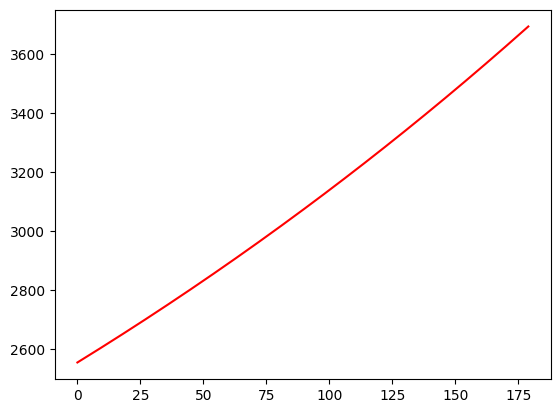

In [22]:
annual_inflation = 0.025
monthly_inflation = (1 + annual_inflation) ** (1 / 12) - 1
cumulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))
expenses_forecast = monthly_expenses * cumulative_inflation_forecast
plt.plot(expenses_forecast, color="red")
plt.show()

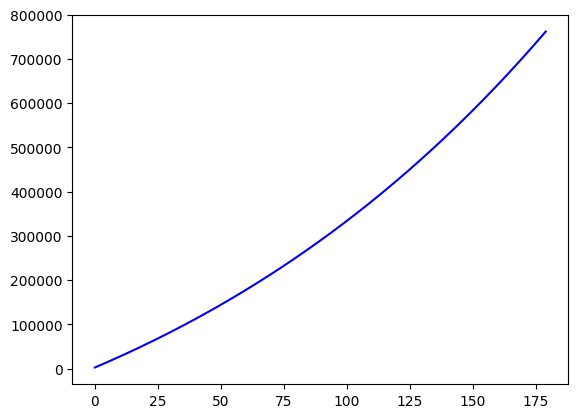

In [23]:
savings_forecast = salary_forecast - expenses_forecast
cumulative_savings = np.cumsum(savings_forecast)
plt.plot(cumulative_savings, color="blue")
plt.show()

In [24]:
investment_rate_annual = 0.07
investment_rate_monthly = (1 + investment_rate_annual) ** (1 / 12) - 1
required_rate_monthly = (1 + 0.05) ** (1 / 12) - 1
required_investment_monthly = npf.pmt(
    rate=investment_rate_monthly, nper=forecast_months, pv=0, fv=-1000000
)
print(
    "You will have to invest $"
    + str(round(required_investment_monthly, 2))
    + " per month to amass $1M over 15 years"
)

You will have to invest $3214.35 per month to amass $1M over 15 years


In [25]:
future_net_worth = 900000
annual_inflation = 0.025
inflation_adjusted_net_worth = npf.pv(rate=annual_inflation, nper=15, pmt=0, fv=-future_net_worth)
print("Your inflation-adjusted net worth: $" + str(round(inflation_adjusted_net_worth, 2)))

Your inflation-adjusted net worth: $621419.0
